In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import numpy as np

In [110]:
frame = pd.read_csv("CMI.csv", index_col=0, parse_dates=True)
frame['Daily Return']=frame["Adj Close"].pct_change()[1:]
frame

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2015-03-02,142.229996,143.460007,141.699997,143.429993,123.238670,1894600,NaN
2015-03-03,144.600006,146.130005,144.259995,145.360001,124.896965,6469800,0.013456
2015-03-04,145.050003,145.330002,142.580002,143.949997,123.685455,2853800,-0.009700
2015-03-05,143.520004,143.919998,142.199997,142.270004,122.241936,2104900,-0.011671
2015-03-06,141.199997,142.509995,139.919998,140.419998,120.652367,1736900,-0.013003
...,...,...,...,...,...,...,...
2020-02-21,165.960007,167.529999,163.559998,167.460007,167.460007,1139600,0.002035
2020-02-24,162.330002,163.809998,161.210007,162.779999,162.779999,1551500,-0.027947
2020-02-25,163.720001,164.330002,160.289993,161.009995,161.009995,1995300,-0.010874


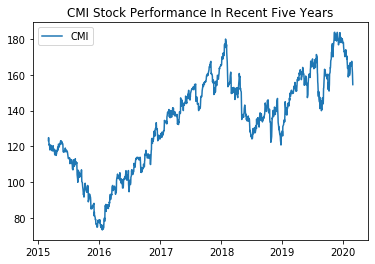

In [111]:
%matplotlib inline
plt.title("CMI Stock Performance In Recent Five Years")
plt.plot(frame.index, frame["Adj Close"], label='CMI')
plt.legend(loc='upper left')
plt.show()

In [112]:
frameSP500=pd.read_csv("^GSPC.csv", index_col=0, parse_dates=True)

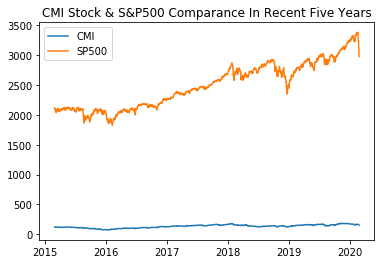

In [113]:
plt.title("CMI Stock & S&P500 Comparance In Recent Five Years")
plt.plot(frame.index, frame["Adj Close"], label='CMI')
plt.plot(frameSP500.index,frameSP500["Adj Close"], label="SP500")
plt.legend(loc='upper left')
plt.show()

In [114]:
#Over the period of the chart, Cummins performance is under the S&P 500

In [115]:
ACCMI=frame["Adj Close"]
DRCMI=ACCMI.pct_change()[1:]
DRCMI

Date
2015-03-03    0.013456
2015-03-04   -0.009700
2015-03-05   -0.011671
2015-03-06   -0.013003
2015-03-09    0.003774
                ...   
2020-02-21    0.002035
2020-02-24   -0.027947
2020-02-25   -0.010874
2020-02-26   -0.018881
2020-02-27   -0.022219
Name: Adj Close, Length: 1257, dtype: float64

In [116]:
ACSP500=frameSP500["Adj Close"]
DRSP500=ACSP500.pct_change()[1:]
DRSP500

Date
2015-03-03   -0.004539
2015-03-04   -0.004389
2015-03-05    0.001196
2015-03-06   -0.014174
2015-03-09    0.003944
                ...   
2020-02-21   -0.010518
2020-02-24   -0.033514
2020-02-25   -0.030280
2020-02-26   -0.003779
2020-02-27   -0.044163
Name: Adj Close, Length: 1257, dtype: float64

In [117]:
ACCMI=frame["Adj Close"]
DRCMI=ACCMI.pct_change()['2018':'2019']
DRCMI

Date
2018-01-02    0.002378
2018-01-03    0.011013
2018-01-04    0.015307
2018-01-05   -0.001596
2018-01-08    0.003637
                ...   
2019-12-24   -0.001433
2019-12-26    0.001435
2019-12-27   -0.003969
2019-12-30   -0.008522
2019-12-31   -0.001116
Name: Adj Close, Length: 503, dtype: float64

In [118]:
ACSP500=frameSP500["Adj Close"]
DRSP500=ACSP500.pct_change()['2018':'2019']
DRSP500

Date
2018-01-02    0.008303
2018-01-03    0.006399
2018-01-04    0.004029
2018-01-05    0.007034
2018-01-08    0.001662
                ...   
2019-12-24   -0.000195
2019-12-26    0.005128
2019-12-27    0.000034
2019-12-30   -0.005781
2019-12-31    0.002946
Name: Adj Close, Length: 503, dtype: float64

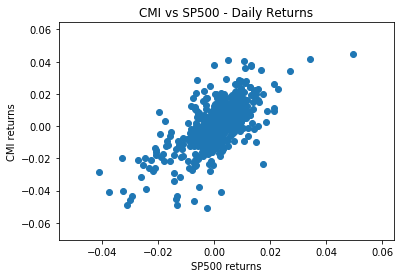

In [119]:
plt.title("CMI vs SP500 - Daily Returns")
plt.scatter(DRSP500['2018':'2019'],DRCMI['2018':'2019'])
plt.xlabel('SP500 returns')
plt.ylabel('CMI returns')
plt.show()

In [120]:
import statsmodels.api as sm

In [121]:
indvars = sm.add_constant(DRSP500) #
model = sm.OLS(DRCMI, indvars).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     405.0
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           1.88e-66
Time:                        18:16:48   Log-Likelihood:                 1548.3
No. Observations:                 503   AIC:                            -3093.
Df Residuals:                     501   BIC:                            -3084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.382      0.7

In [122]:
#R-squard=0.447
#The equation of the regression line is 1.0647
#y=1.0647x-0.0002

In [123]:
max(DRCMI)

0.044465764891086

In [124]:
maxCMIRT=frame.idxmax()
maxCMIRT

Open           2018-01-29
High           2018-01-29
Low            2018-01-29
Close          2018-01-26
Adj Close      2019-11-11
Volume         2015-12-01
Daily Return   2016-02-04
dtype: datetime64[ns]

In [125]:
a=frame.loc['2016-02-04']
a

Open            9.118000e+01
High            9.797000e+01
Low             9.083000e+01
Close           9.757000e+01
Adj Close       8.579494e+01
Volume          5.691400e+06
Daily Return    7.621854e-02
Name: 2016-02-04 00:00:00, dtype: float64

In [126]:
minCMIRT=frame.idxmin()
minCMIRT

Open           2016-01-20
High           2016-01-15
Low            2016-01-20
Close          2016-01-19
Adj Close      2016-01-19
Volume         2019-12-24
Daily Return   2015-10-27
dtype: datetime64[ns]

In [127]:
b=frame.loc['2015-10-27']
b

Open            1.007500e+02
High            1.044400e+02
Low             1.006100e+02
Close           1.023500e+02
Adj Close       8.910178e+01
Volume          8.068400e+06
Daily Return   -8.697588e-02
Name: 2015-10-27 00:00:00, dtype: float64

In [128]:
df=pd.DataFrame([a,b])
df

,Open,High,Low,Close,Adj Close,Volume,Daily Return
2016-02-04,91.18,97.970001,90.830002,97.570000,85.794937,5691400.0,0.076219
2015-10-27,100.75,104.440002,100.610001,102.349998,89.101784,8068400.0,-0.086976


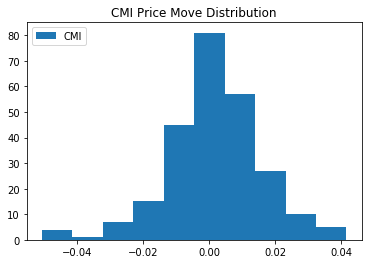

In [129]:
plt.title("CMI Price Move Distribution")
plt.hist(frame["Daily Return"]['2019'], label='CMI')
plt.legend(loc='upper left')
plt.show()

In [130]:
print("mean=", "%.5f" % DRCMI.mean())
print("std dev=", "%.5f" % DRCMI.std())
print("skewness=", "%.1f" % DRCMI.skew())
print("kurtosis=", "%.1f" % DRCMI.kurt())

mean= 0.00026
std dev= 0.01500
skewness= -0.4
kurtosis= 1.2


In [131]:
#Daily return of Cummins is not unber normal distribution because skewness is over -0.3 and skewness is over 0.6